In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("USA-P1_depth.txt", sep = '\t')

In [36]:
bin1 = pd.read_csv("bin.1", header = None, names = ['contigName'])
bin1['bin'] = 1
bin2 = pd.read_csv("bin.2", header = None, names = ['contigName'])
bin2['bin'] = 2
bin3 = pd.read_csv("bin.3", header = None, names = ['contigName'])
bin3['bin'] = 3
bin4 = pd.read_csv("bin.4", header = None, names = ['contigName'])
bin4['bin'] = 4

bins = pd.concat([bin1, bin2, bin3, bin4])

In [38]:
test = pd.merge(df, bins, left_on="contigName", right_on="contigName", how='left')
test['bin'] = test['bin'].fillna(0).astype(int)

In [95]:
# get percet identity
paf = pd.read_csv("USA-P1_minimap_allvsall.paf", sep='\t', header = None, names = ['Query','QLen','QStart','QEnd','Orientation','Subject',
              'SLen','SStart','SEnd','Matches','AlignLength','MAPQ','x.1','x.2','x.3','x.4','x.5'])
paf['contLen'] = paf[['QLen','SLen']].min(axis=1)
paf['pIden'] = (paf['QEnd'] - paf['QStart']) / paf['contLen']

In [ ]:
paf[paf['pIden'] > 1]

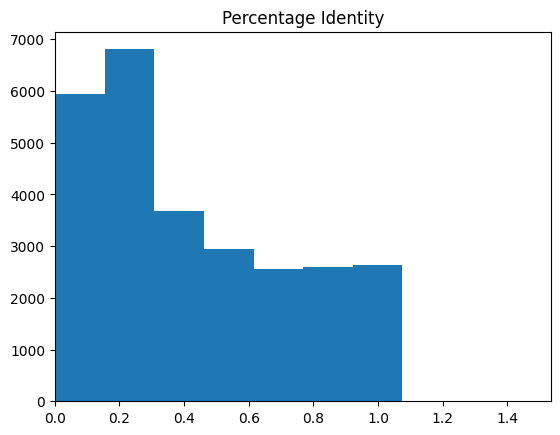

In [101]:
# percent identity histogram
plt.hist(paf['pIden'])
plt.title('Percentage Identity')
plt.xlim(0.0, paf['pIden'].max())
plt.show() 

In [104]:
# analyzing clusters
clusters = pd.read_csv("USA-P1_Clusters.txt", sep='\t')
clusters = clusters.iloc[: , 1:]
clusters

,RepresentativeContig,Contig,EdgeType,RepresentativeLength,ContigLength,qstart,qend,sstart,send,Cluster_ID
0,SRR12664575.1.1_segment0_np1212,SRR12664619.12041.1,s in q,31319,349,7233,7575,3,344,0
1,SRR12664575.1.1_segment0_np1212,SRR12664619.12574.1,s in q,31319,404,15803,16201,0,400,0
2,SRR12664575.1.1_segment0_np1212,SRR12664619.29218.1,s in q,31319,451,23234,23660,5,431,0
3,SRR12664575.1.1_segment0_np1212,SRR12664619.30182.1,s in q,31319,551,18211,18743,2,531,0
4,SRR12664575.1.1_segment0_np1212,SRR12664619.3072.1,s in q,31319,904,3557,4447,5,895,0
...,...,...,...,...,...,...,...,...,...,...
395,SRR12664575.94.1_segment0_np1212,SRR12664619.64381.1,s in q,30896,353,21563,21906,9,352,53
396,SRR12664575.94.1_segment0_np1212,SRR12664619.68185.1,s in q,30896,627,24771,25393,0,622,53
397,SRR12664575.94.1_segment0_np1212,SRR12664619.6838.1,s in q,30896,589,10652,11211,21,580,53
398,SRR12664575.94.1_segment0_np1212,SRR12664619.95391.1,s in q,30896,1670,19685,21347,7,1670,53


In [190]:
lr = pd.DataFrame(clusters['RepresentativeContig'].unique(), columns = ['contName'])
lr['contLen'] = clusters['RepresentativeLength'].unique()
lr['coverage'] = 0
# finding the bp coverage for each contig
for i in range(0, len(lr['contLen'])):
  smalldf = clusters[clusters['RepresentativeContig'] == lr['contName'][i]]
  bases = np.zeros(lr['contLen'][i] + 1)
  for k in range(0, len(smalldf['qstart'])):
    bases[smalldf.iloc[k,5]:smalldf.iloc[k,6]+1] = 1
  lr.iloc[i,2] = int(bases.sum())

lr['breadth'] = lr['coverage'] / lr['contLen']
lr

,contName,contLen,coverage,breadth
0,SRR12664575.1.1_segment0_np1212,31319,6511,0.207893
1,SRR12664575.34.1_segment0_np1212,11381,310,0.027238
2,SRR12664575.10.1_segment0_np1212,36840,317,0.008605
3,SRR12664575.11.1_segment0_np1212,11517,2966,0.257532
4,SRR12664575.12.1_segment0_np1212,1612,581,0.360422
...,...,...,...,...
67,SRR12664575.89.1_segment0_np1212,19293,1254,0.064998
68,SRR12664575.92.1_segment0_np1212,12449,2603,0.209093
69,SRR12664575.93.1_segment0_np1212,4847,823,0.169796
70,SRR12664575.94.1_segment0_np1212,30896,5045,0.163290


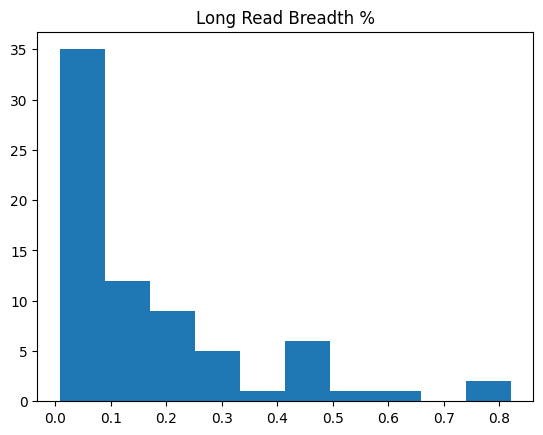

In [196]:
plt.hist(lr['breadth'])
plt.title('Long Read Breadth %')
plt.show() 

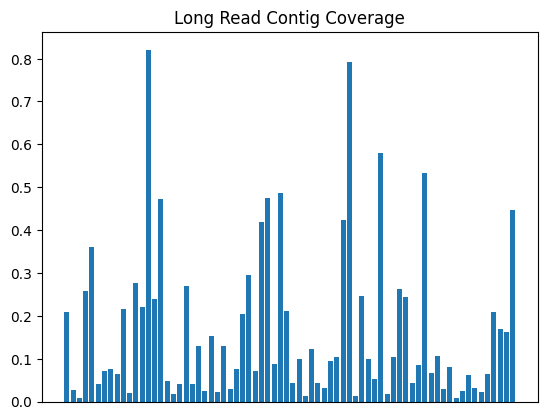

In [197]:
plt.bar(lr['contName'], lr['breadth'])
plt.title('Long Read Contig Coverage')
plt.xticks([])
plt.show() 